In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy import stats  # 과학용 계산 라이브러리

df = pd.read_csv("C:/AI/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

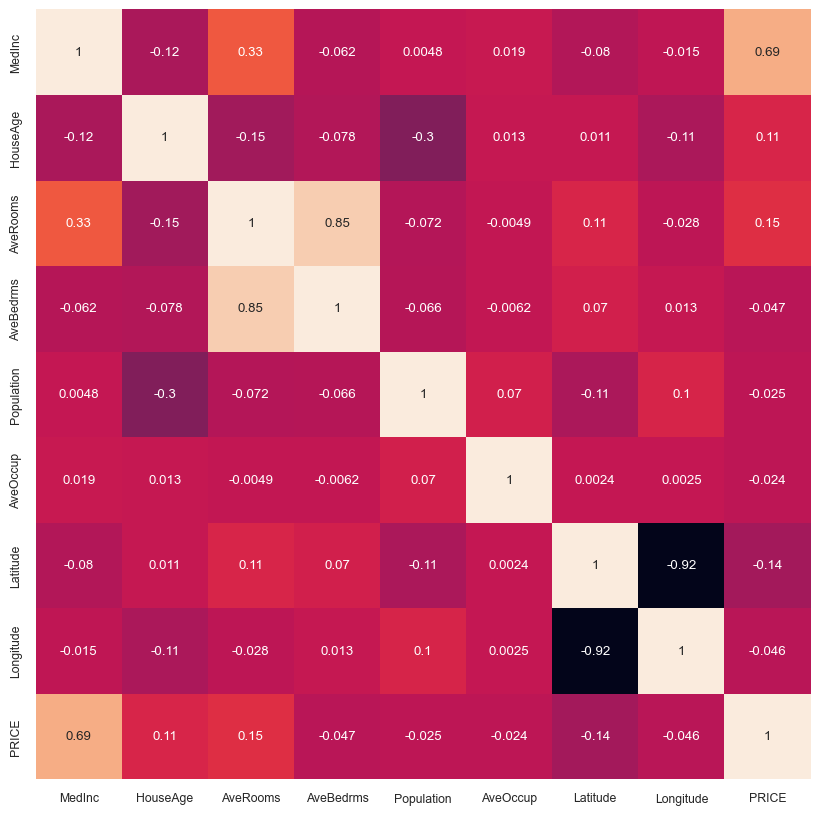

In [3]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음, 보통 앞으로 우리가 볼 수치는 0.4언저리까지

df_corr=df.corr()

#히트맵->상관관계 확인
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8) 
sns.heatmap(df_corr, annot=True, cbar=False) #annot -> 각 셀의 상관관계, cbar -> 색상막대
plt.show()

# 현재 데이터에서 PRICE와 높은 건  MedInc, AveRooms

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df.columns #다 가져다 쓰다보면 오타가 날 수 있으니, columns로 복사해서 가져오기

new_df=df[['MedInc','AveRooms','PRICE']] #new_df에 선택한 피처들 저장

In [6]:
new_df

,MedInc,AveRooms,PRICE
0,8.3252,6.984127,4.526
1,8.3014,6.238137,3.585
2,7.2574,8.288136,3.521
3,5.6431,5.817352,3.413
4,3.8462,6.281853,3.422
...,...,...,...
20635,1.5603,5.045455,0.781
20636,2.5568,6.114035,0.771
20637,1.7000,5.205543,0.923
20638,1.8672,5.329513,0.847


In [7]:
X = new_df.drop('PRICE',axis=1)
X.head()

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853


In [8]:
y = new_df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

 # x 독립, y 종속 변수 / test_size -> 테스트 비율 / shuffle->나누기 전 랜덤으로 섞기/ random_state 난수생성기 시드
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 2) (16512,)
(4128, 2) (4128,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#mse 구하는 방법 3가지 1번째
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

#2번째
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

#3번째
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.6916011698420803
평균제곱근오차 0.6916011698420803
평균제곱근오차 0.6916011698420814


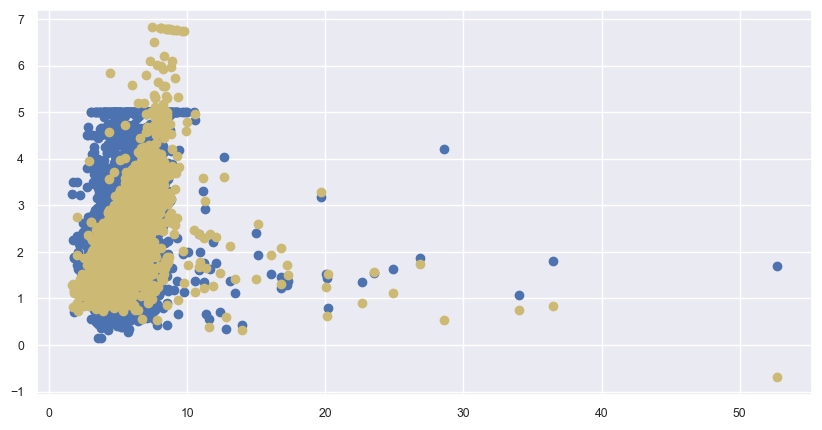

In [11]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['AveRooms'], y_test, label='y_test')
plt.scatter(X_test['AveRooms'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

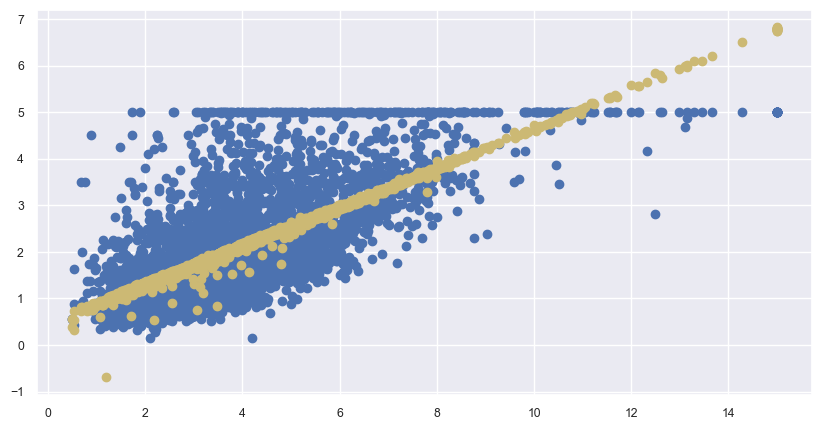

In [12]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 1.176127063247432


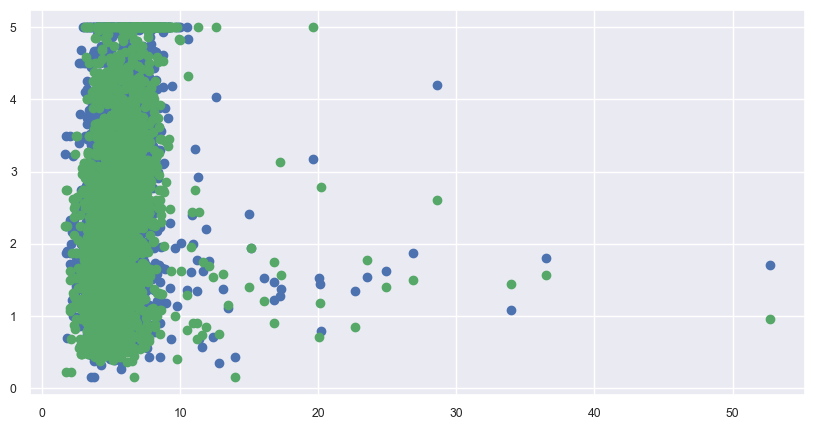

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['AveRooms'], y_test, label='y_test')
plt.scatter(X_test['AveRooms'], dy_preds, c='g', label='dy_preds')
plt.show() 

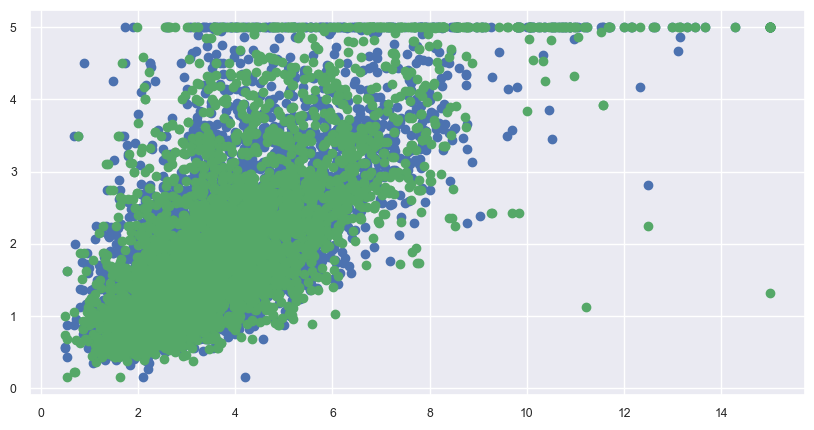

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.6889341981141855


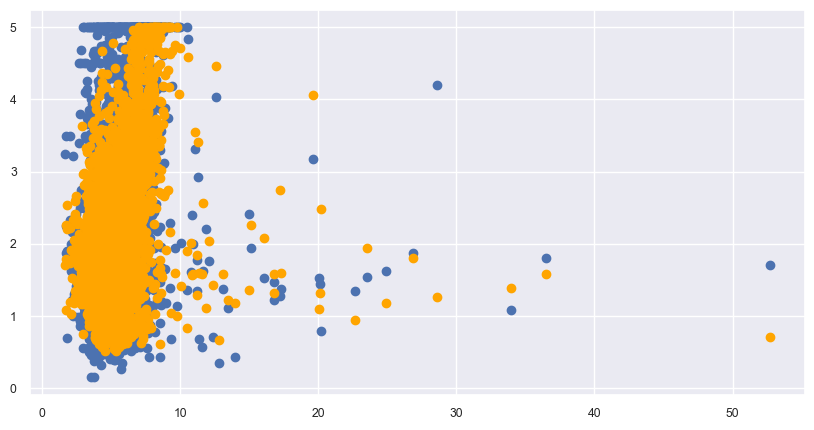

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['AveRooms'], y_test, label='y_test')
plt.scatter(X_test['AveRooms'], ry_preds, c='orange', label='ry_preds')

plt.show()     

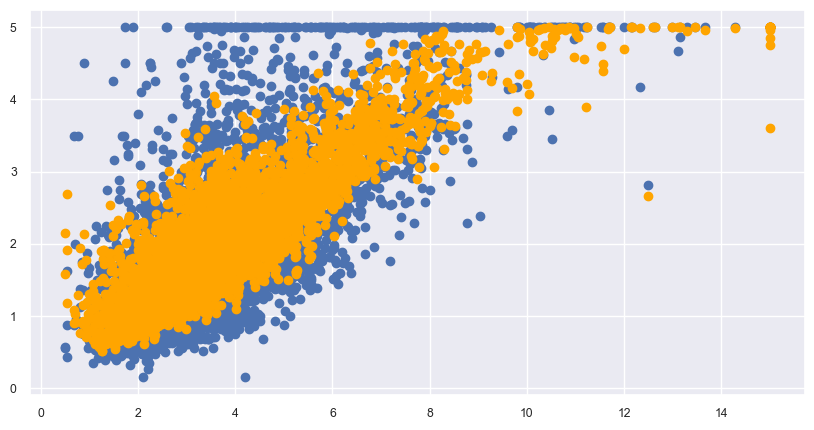

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()     

In [19]:
#SVR모델은 실행하는데 시간이 오래걸림ㅠㅠ
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.7195700003756296


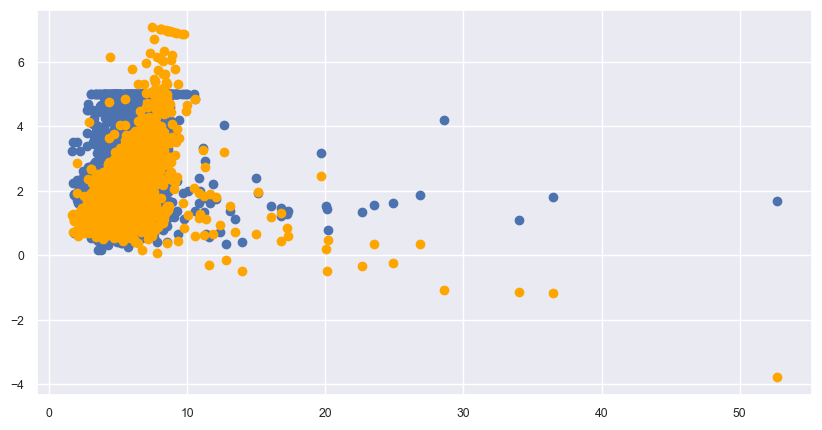

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['AveRooms'], y_test, label='y_test')
plt.scatter(X_test['AveRooms'], ry_preds, c='orange', label='ry_preds')

plt.show() 

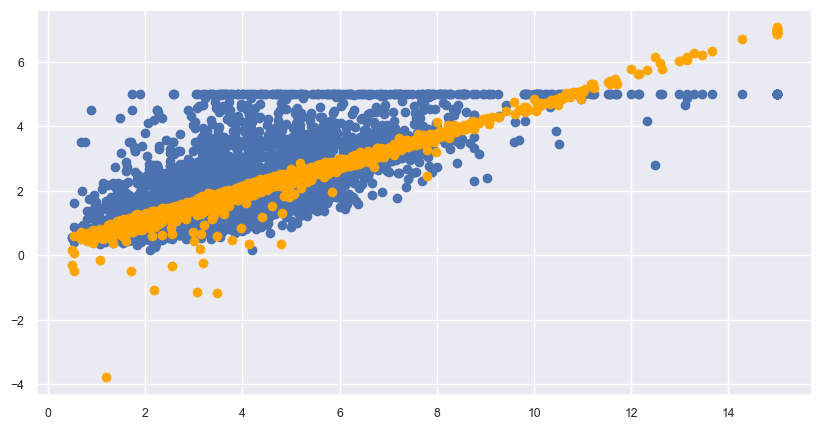

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()    